![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

### Amaliyot. Simple Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
df_X = df.drop("Sales", axis=1)

Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish:
- CRISP-DM metodologiyasiga amal qiling!
- Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

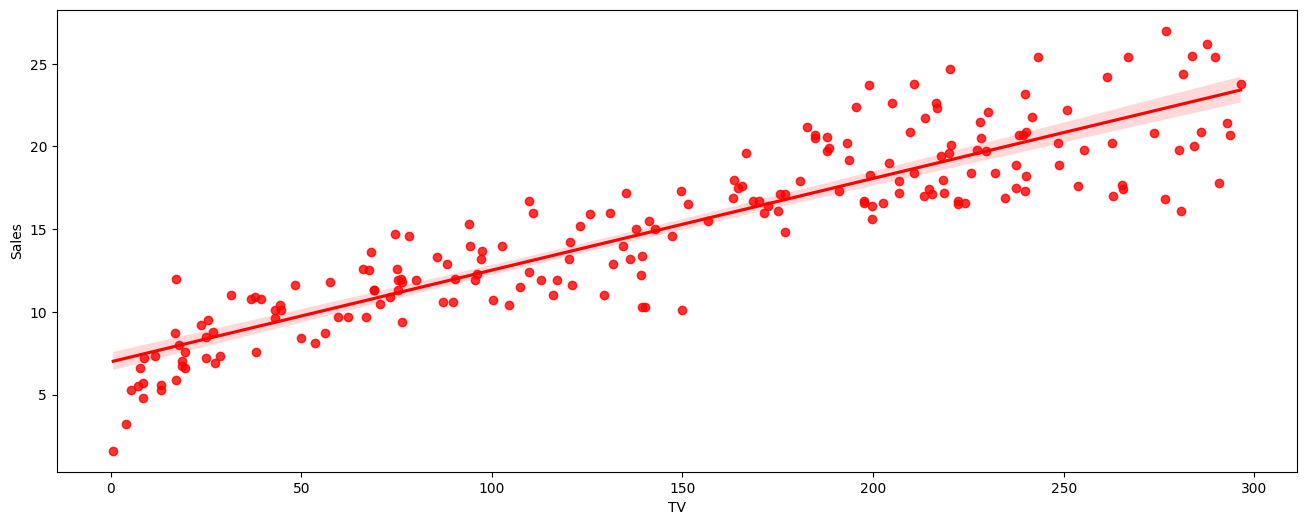

In [24]:
# tv va sotilishlarni bog'liqligini topamiz
plt.figure(figsize=(16,6))
#sns.scatterplot(x="TV", y="Sales" , data=df, size = "Sales" ,hue="Sales")
sns.regplot(data = df , x="TV", y="Sales" , color = "r",)
plt.show()
#Chiziqli bog'liqlik bor

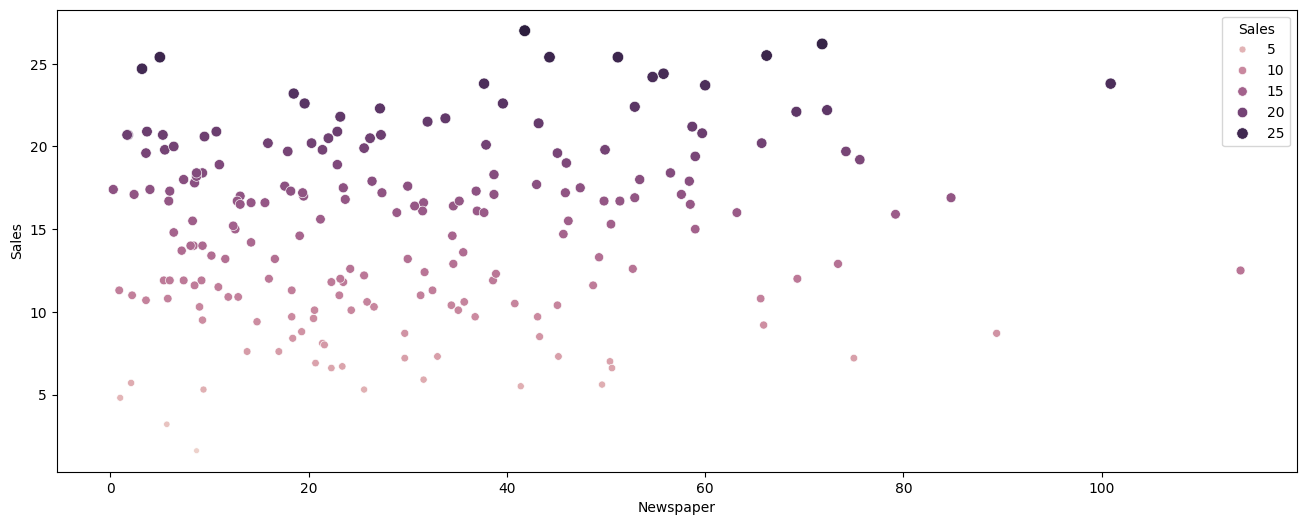

In [20]:
# Newspaper va Sales lar o'rtasidagi bog'liqlikni ko'ramiz
plt.figure(figsize=(16,6))
sns.scatterplot(y="Sales", x="Newspaper" , data=df ,size = "Sales" ,hue="Sales")
plt.show()
#bog'liqlik yo'q

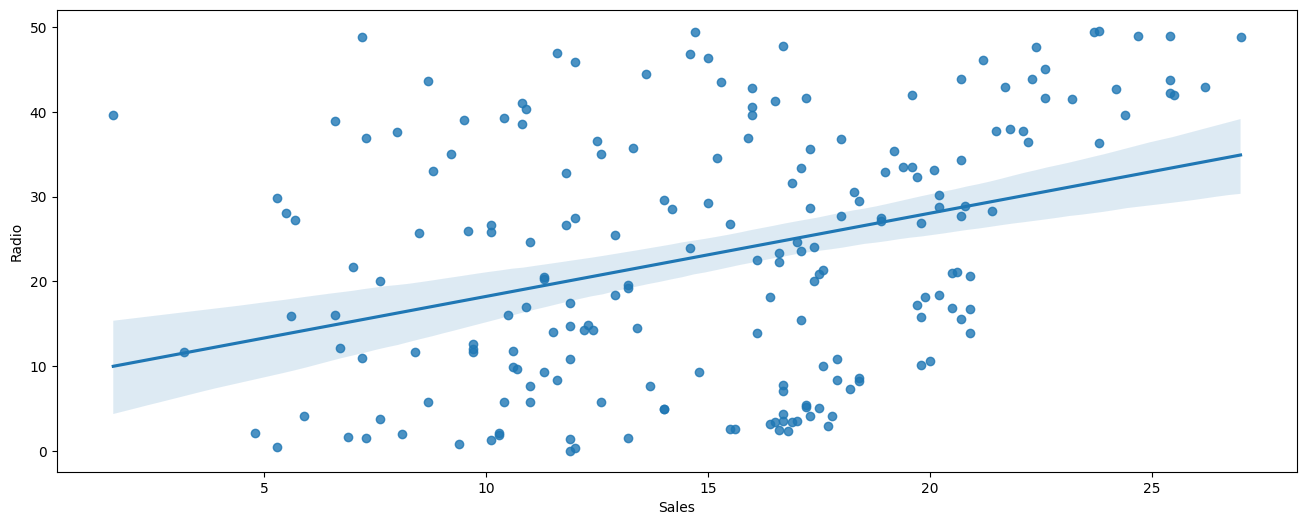

In [19]:
# radio va sales bog'liqliklarni ko'ramiz
plt.figure(figsize=(16,6))
#sns.scatterplot(x="Sales", y="Radio" , data=df,size = "Sales")
sns.regplot(data = df , x= "Sales",y="Radio")
plt.show()
#bog'liqlik yo'q

In [9]:
#correlation tekshiramiz
df.corr() #tv da sotuvlar juda baland.

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


**TV**da berilgan reklamalaar ancha foydali bo'lgan.

In [25]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


***TV va Sales uchun model yaratamiz.***

In [34]:
#TV ni ajratamiz
df_tv = df.TV

In [35]:
df_y = df.Sales

In [70]:
X = np.array(df_tv)
X.shape

(200,)

In [71]:
y = np.array(df_y)
y.shape

(200,)

In [33]:
#X uchun o'rtachasi chiqaramiz
X_mean = np.mean(X)
X_mean


np.float64(147.0425)

In [43]:
#y uchun o'rtachasini topamiz
y_mean= np.sum(y)/len(y) #Sumani soniga bo'lib yuborsakham chiqadi o'rtachasi
y_mean

np.float64(15.130500000000001)

**Formuladan foydalanib model quramiz.**

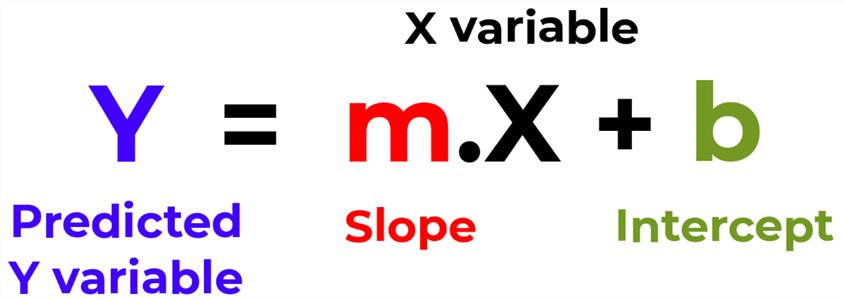

In [46]:
# Slop ni topmaniz
m = np.sum((X-X_mean)*(y-y_mean))/np.sum((X-X_mean)**2)

In [47]:
b = y_mean - m*X_mean

In [49]:
Y = m*X+b
Y

array([19.73726517,  9.44300377,  7.92881554, 15.37773421, 17.00285199,
        7.45736499, 10.16404579, 13.6416869 ,  7.45181851, 18.05668263,
       10.64104282, 18.88310771,  8.29488303, 12.38263661, 18.29518114,
       17.81263764, 10.73533293, 22.5826079 , 10.8129836 , 15.14478218,
       19.08832736, 20.142158  ,  7.70695646, 19.63742859, 10.43027669,
       21.55650964, 14.90073719, 20.29191288, 20.77445638, 10.89063428,
       23.22045276, 13.23679407, 12.36599718, 21.70626452, 12.28280002,
       23.09843026, 21.77836873, 11.11803984,  9.3653531 , 19.62078916,
       18.20643751, 16.79208586, 23.2592781 , 18.4504825 ,  8.36698723,
       16.6867028 , 11.9500114 , 20.28081992, 19.57641734, 10.68541463,
       18.05668263, 12.54348444, 18.97739782, 17.10268858, 21.54541669,
       18.00676433,  7.37971431, 14.52912323, 18.6667951 , 18.66124863,
        9.94218671, 21.46776601, 20.24754106, 12.67105342, 14.2462529 ,
       10.80189065,  8.72196176, 14.70106401, 20.142158  , 18.99

In [76]:
#Endi sklearn oraqli Liner regressiondan foydalanamiz
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X=X.reshape(-1,1)
model.fit(X , y)

LinearRegression()

In [77]:
Y_Pridextion = model.predict(X)

**Mean Squared Error orqali hatolikni topamiz.**

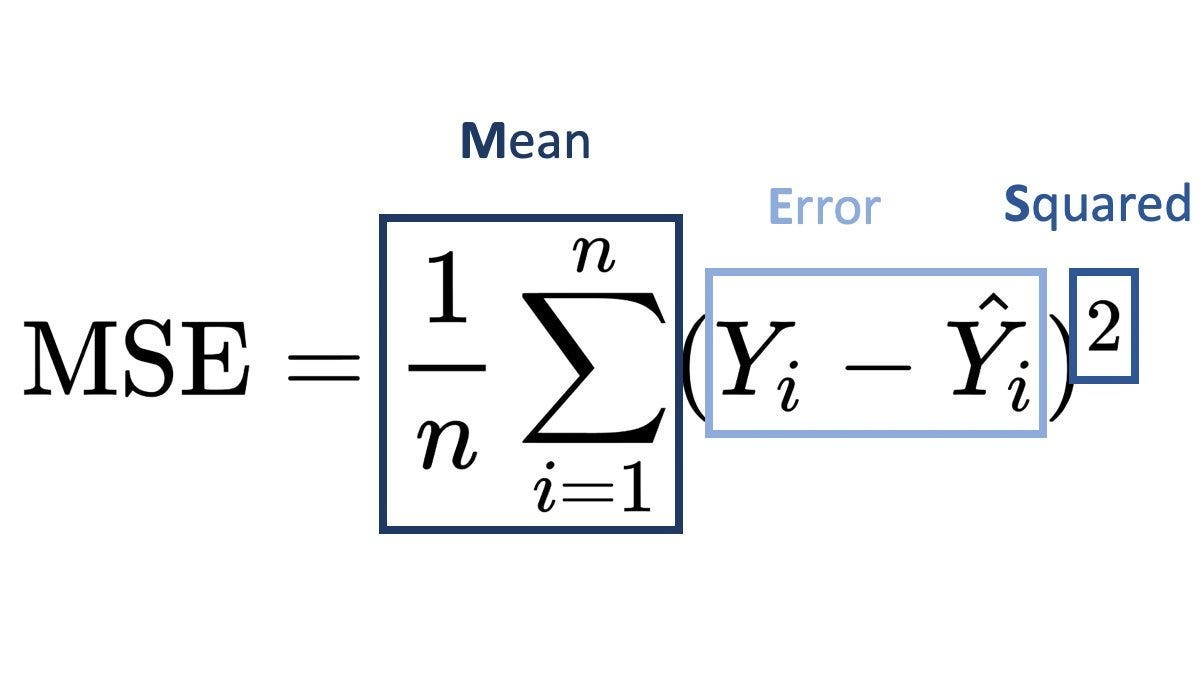

In [67]:
def mse(predictions , label):
  ''' Men bu funksiya orqali o'rtacha hatolikni topmoqchiman .'''
  error = (Y-y)**2
  mse = np.mean(error)
  return mse

In [68]:
mse(Y,y)

np.float64(5.2177438977951285)

In [78]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y , Y)
mse

5.2177438977951285

**Sklearning orqali chiqan qiymatni ko'ramiz.**

In [79]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y , Y_Pridextion)
mse

5.2177438977951285